# Perform EDA

## read data

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('nyc_taxi_trip_duration.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


## check null values and data types

In [6]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [10]:
df.info

<bound method DataFrame.info of                id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1       id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2       id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3       id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4       id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   
...           ...        ...                  ...                  ...   
729317  id3905982          2  2016-05-21 13:29:38  2016-05-21 13:34:34   
729318  id0102861          1  2016-02-22 00:43:11  2016-02-22 00:48:26   
729319  id0439699          1  2016-04-15 18:56:48  2016-04-15 19:08:01   
729320  id2078912          1  2016-06-19 09:50:47  2016-06-19 09:58:14   
729321  id1053441          2  2016-01-01 17:24:16  2016-01-01 17:44:40   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  

## Summary statistics

In [13]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [15]:
print(df['vendor_id'].value_counts())

vendor_id
2    390481
1    338841
Name: count, dtype: int64


In [17]:
print(df['passenger_count'].value_counts())

passenger_count
1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64


In [19]:
print(df['store_and_fwd_flag'].value_counts())

store_and_fwd_flag
N    725282
Y      4040
Name: count, dtype: int64


## visualizations

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

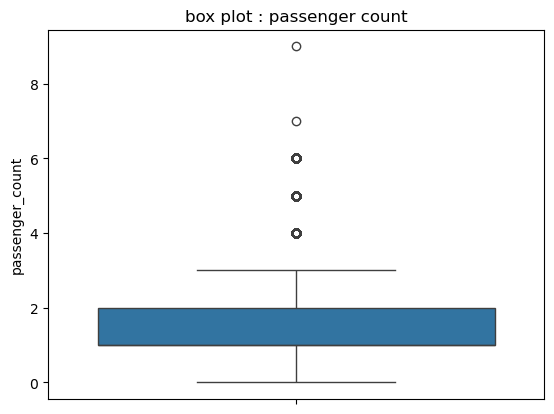

In [44]:
sns.boxplot(df['passenger_count'])
plt.title("box plot : passenger count")
plt.show()

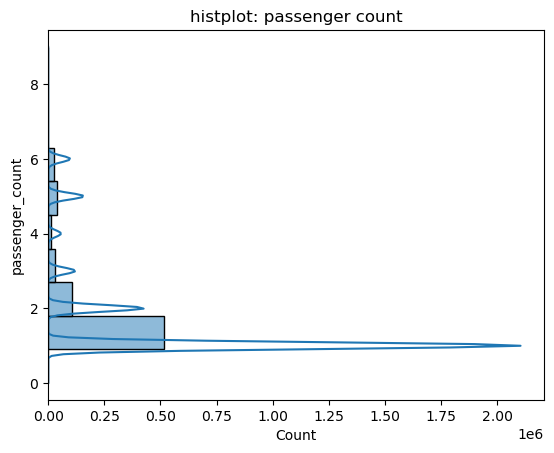

In [46]:
sns.histplot(y=df['passenger_count'],bins=10,kde=True)
plt.title("histplot: passenger count")
plt.show()

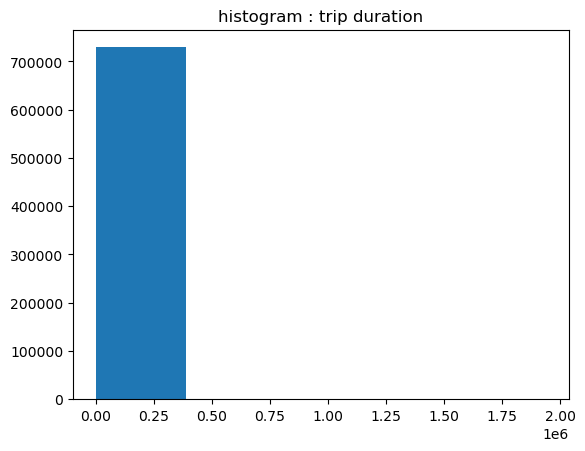

In [48]:
plt.hist(df['trip_duration'],bins=5)
plt.title("histogram : trip duration")
plt.show()

## Extract day, hour, weekday from pickup_datetime and dropoff_datetime

In [51]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [58]:

df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday 

df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday

## plot trip duration

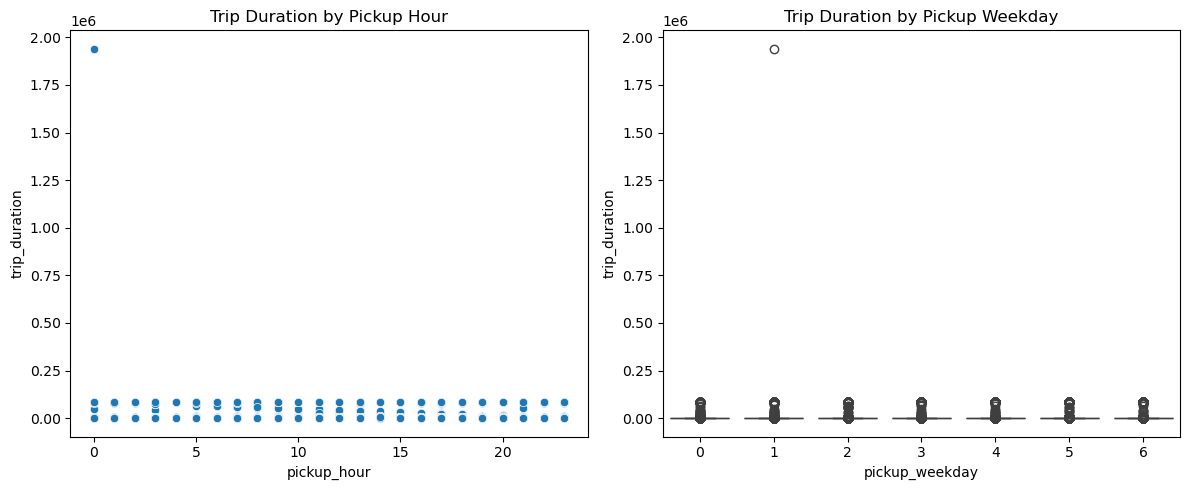

In [61]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='pickup_hour', y='trip_duration', data=df)
plt.title('Trip Duration by Pickup Hour')

plt.subplot(1,2,2)
sns.boxplot(x='pickup_weekday', y='trip_duration', data=df)
plt.title('Trip Duration by Pickup Weekday')

plt.tight_layout()
plt.show()

## Identify clusters or hot zones of pickup/dropoff

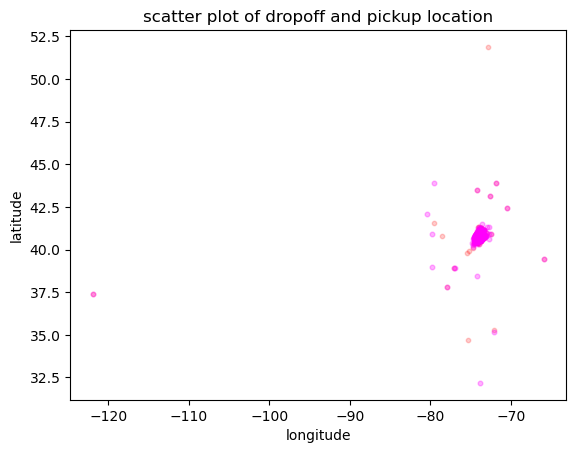

In [74]:
plt.scatter(df['pickup_longitude'], df['pickup_latitude'],
                alpha=0.2,s=10,c='red',label='pickup')
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'],
                alpha=0.3,s=11,c='magenta',label="dropoff")
plt.title("scatter plot of dropoff and pickup location")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()


## hexbin plots of pickup/dropoff locations


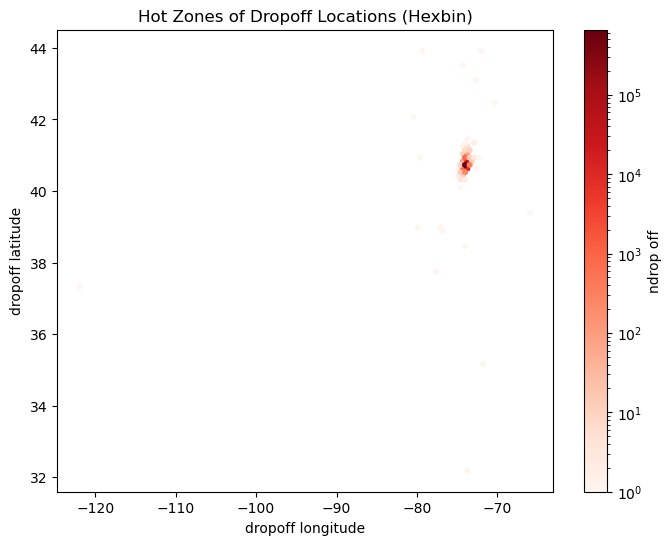

In [78]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['dropoff_longitude'], df['dropoff_latitude'], gridsize=100, cmap='Reds', bins='log')
plt.colorbar(label='ndrop off')
plt.xlabel("dropoff longitude")
plt.ylabel("dropoff latitude")
plt.title("Hot Zones of Dropoff Locations (Hexbin)")
plt.show()

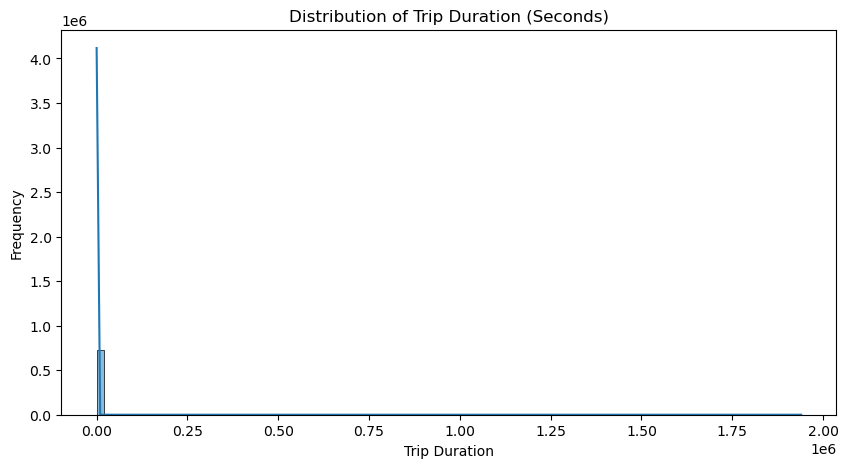

Skewness before log transform: 186.6784368781186


In [80]:

plt.figure(figsize=(10, 5))
sns.histplot(df['trip_duration'], bins=100, kde=True)
plt.title('Distribution of Trip Duration (Seconds)')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.show()

print("Skewness before log transform:", df['trip_duration'].skew())


## Relationship between trip duration and: Passenger count,Time of day, Vendor, Store and forward flag


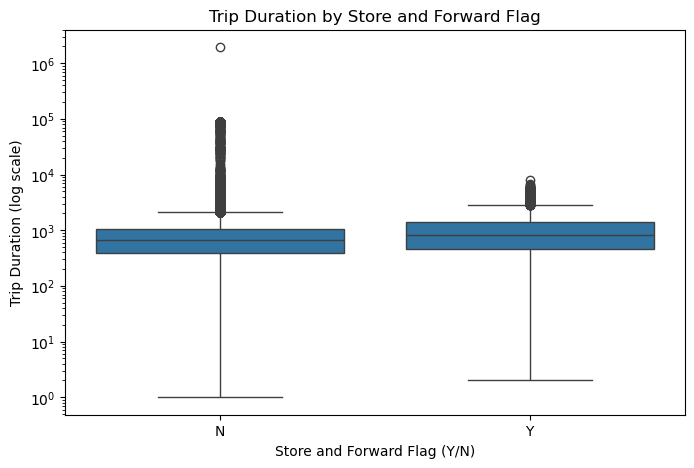

In [87]:
plt.figure(figsize=(8,5))
sns.boxplot(x='store_and_fwd_flag', y='trip_duration', data=df)
plt.yscale('log')
plt.title('Trip Duration by Store and Forward Flag')
plt.xlabel('Store and Forward Flag (Y/N)')
plt.ylabel('Trip Duration (log scale)')
plt.show()


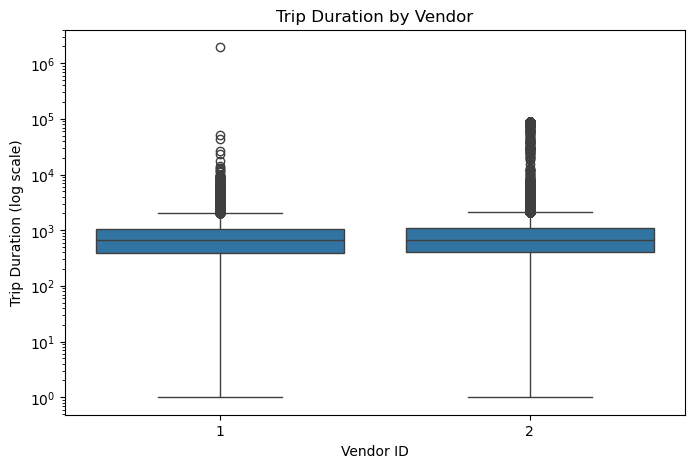

In [89]:
plt.figure(figsize=(8,5))
sns.boxplot(x='vendor_id', y='trip_duration', data=df)
plt.yscale('log')
plt.title('Trip Duration by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration (log scale)')
plt.show()

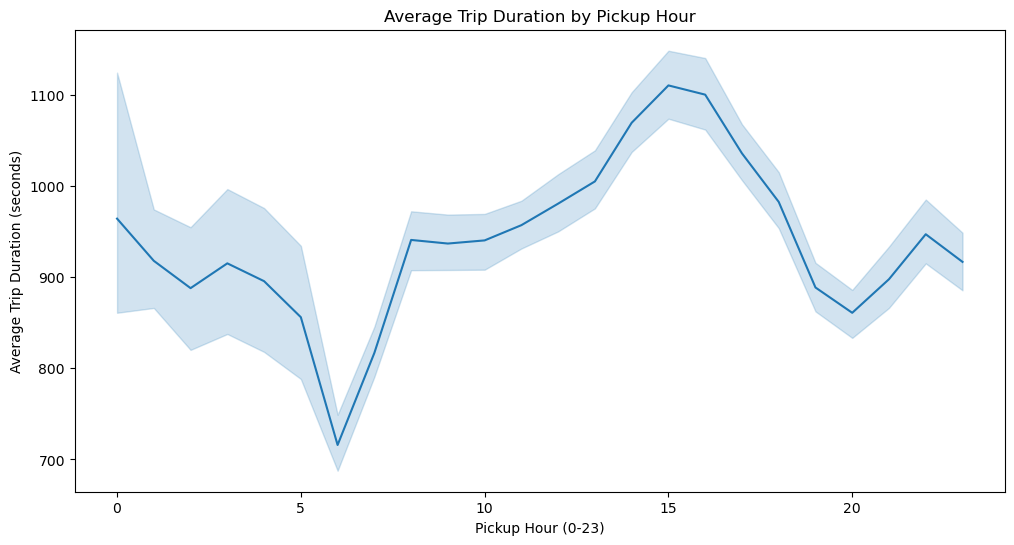

In [91]:
plt.figure(figsize=(12,6))
sns.lineplot(x='pickup_hour', y='trip_duration', data=df, estimator='mean')
plt.title('Average Trip Duration by Pickup Hour')
plt.xlabel('Pickup Hour (0-23)')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()

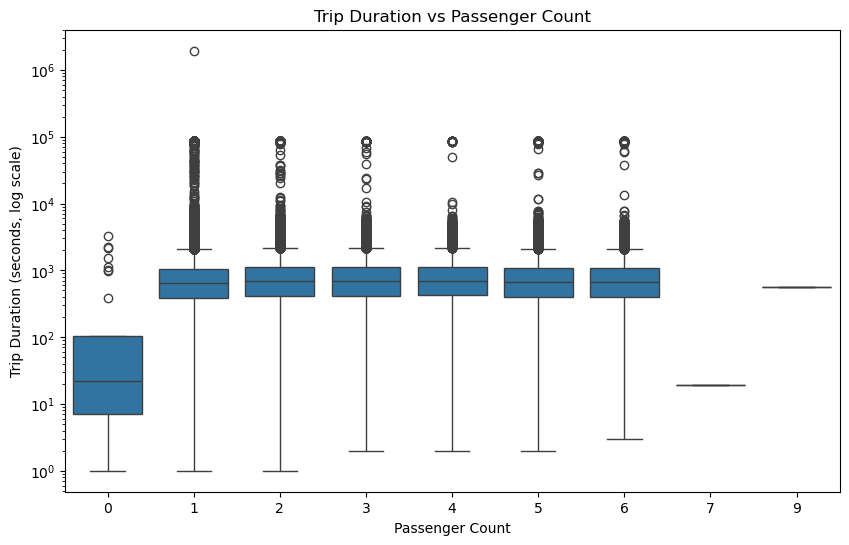

In [95]:
plt.figure(figsize=(10,6))
sns.boxplot(x='passenger_count', y='trip_duration', data=df)
plt.title('Trip Duration vs Passenger Count')
plt.yscale('log')  
plt.ylabel('Trip Duration (seconds, log scale)')
plt.xlabel('Passenger Count')
plt.show()
